In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
query = engine.execute('SELECT * FROM Measurement').fetchall()

In [10]:
df = pd.read_sql_query("SELECT * FROM Measurement", engine)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       19550 non-null  int64  
 1   station  19550 non-null  object 
 2   date     19550 non-null  object 
 3   prcp     18103 non-null  float64
 4   tobs     19550 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [13]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       19550 non-null  int64         
 1   station  19550 non-null  object        
 2   date     19550 non-null  datetime64[ns]
 3   prcp     18103 non-null  float64       
 4   tobs     19550 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 763.8+ KB


In [14]:
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [17]:
df2 = df.loc[(df['date'] >= '2016-8-23') & (df['date'] <='2017-8-23')]
df2.tail()

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


In [18]:
df2.head()

,id,station,date,prcp,tobs
2363,2364,USC00519397,2016-08-23,0.00,81.0
2364,2365,USC00519397,2016-08-24,0.08,79.0
2365,2366,USC00519397,2016-08-25,0.08,80.0
2366,2367,USC00519397,2016-08-26,0.00,79.0
2367,2368,USC00519397,2016-08-27,0.00,77.0


In [47]:
df3 = df2[['date', 'prcp']]
df3.set_index('date', inplace=True)
df3.sort_values(by='date')
df3

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2230 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    2021 non-null   float64
dtypes: float64(1)
memory usage: 34.8 KB


In [54]:
df4 = df2.loc[(df2['date'] >= '2017-8-23')]
df4

,id,station,date,prcp,tobs
2723,2724,USC00519397,2017-08-23,0.00,81.0
7634,7635,USC00514830,2017-08-23,0.00,82.0
12186,12187,USC00519523,2017-08-23,0.08,82.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


<AxesSubplot: xlabel='date'>

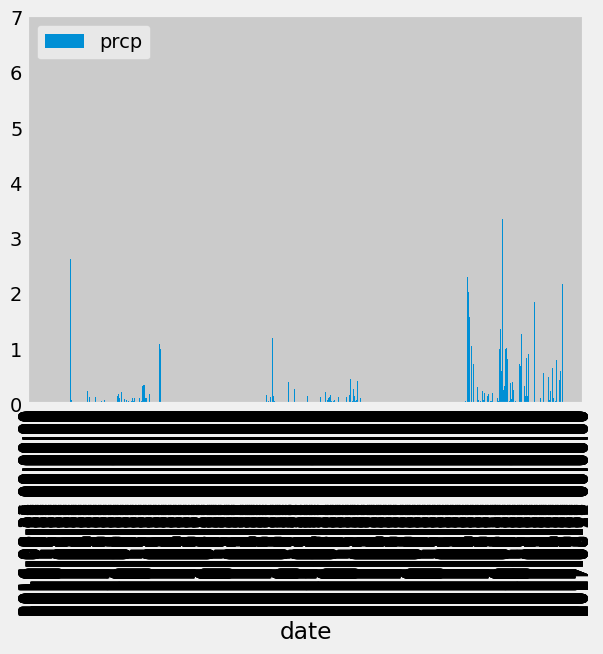

In [25]:
df3.plot.bar()

In [27]:
df3

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [28]:
df3.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [34]:
station_count = df['station'].value_counts()
station_count


USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [35]:
station_count.count()

9

In [38]:
most_activestation_df = df.loc[df["station"] == 'USC00519281', :]
most_activestation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 12187 to 14958
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       2772 non-null   int64         
 1   station  2772 non-null   object        
 2   date     2772 non-null   datetime64[ns]
 3   prcp     2772 non-null   float64       
 4   tobs     2772 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 129.9+ KB


In [39]:
most_activestation_df.head()

,id,station,date,prcp,tobs
12187,12188,USC00519281,2010-01-01,0.15,70.0
12188,12189,USC00519281,2010-01-02,0.00,62.0
12189,12190,USC00519281,2010-01-03,0.00,74.0
12190,12191,USC00519281,2010-01-04,0.00,75.0
12191,12192,USC00519281,2010-01-05,0.00,74.0


In [40]:
most_activestation_df.agg({'tobs':['min', 'max', 'mean']})

,tobs
min,54.000000
max,85.000000
mean,71.663781


array([[<AxesSubplot: title={'center': 'tobs'}>]], dtype=object)

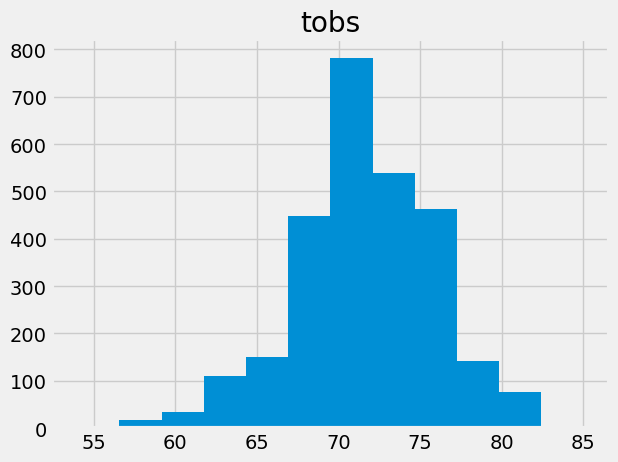

In [42]:
most_activestation_df.hist(column = 'tobs', bins=12)

In [ ]:
# Import dependency
from sqlalchemy import create_engine, inspect, func

In [ ]:
# An alternate way to view all the tables within the database
inspector = inspect(engine)
inspector.get_table_names()

In [ ]:
# Get the column name and type for the 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

In [ ]:
# Get the column name and type for the 'station' table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

In [ ]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

In [ ]:
session.query(Measurement.date).\
    filter(Measurement.date > '2017-08-20').\
    order_by(Measurement.date).all()

In [ ]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

In [ ]:
last_date = dt.datetime(2017, 8, 23)
year_ago_date = dt.datetime(2016, 8, 23)

In [ ]:
sel = [Measurement.date, Measurement.prcp]

In [ ]:
results = session.query(*sel).\
    filter(Measurement.date > year_ago_date, Measurement.date < last_date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
results

In [ ]:
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.sort_values(by='date')
df

In [ ]:
df.describe()

In [ ]:


# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
total_station_count = session.query(Station).distinct().count()
total_station_count


In [ ]:
total_station_count_02 = session.query(Measurement.station).distinct().count()
total_station_count_02

In [ ]:
col = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()
col
# session.query(col).order_by(col)


In [ ]:
df_02 = pd.DataFrame(col, columns=['station', 'station_count'])
df_03 = df_02.sort_values(by=['station_count'], ascending=False)
# df_02.reset_index(drop=False)
df_03


In [ ]:
df_03['station_count'].max()

In [ ]:
sel = [Dow.stock, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.avg(Dow.close_price)]

In [ ]:
most_active_station = session.query(Measurement.station == 'USC00519281')




In [ ]:
low_temp = func.min(most_active_station)

In [ ]:
sel_02 = [Measurement.station, Measurement.tobs]

In [ ]:
results_03 = session.query(*sel_02).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.tobs).\
    order_by(Measurement.tobs).all()
results_03

# may_averages = session.query(*sel).\
#     filter(func.strftime("%m", Dow.date) == "05").\
#     group_by(Dow.stock).\
#     order_by(Dow.stock).all()
# may_averages

In [ ]:
overcast_cities_count = session.query(Measurement.station == 'USC00519281')
    
    


# overcast_cities_count = session.query(Sunshine).\
#     filter(Sunshine.Country == 'United States').\
#     filter(Sunshine.Year <= 2500).count()

# print(overcast_cities_count)

In [ ]:
types = session.query(Measurement).\
    filter(Measurement.station == 'USC00519281')


In [ ]:
for x in types:
    print(x.station, x.tobs)

In [ ]:
query2 = session.query(func.max(x.tobs))

In [ ]:
for x in query2:
    print(x)

In [ ]:
query3 = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281')
for x in query3:
    print(x)

In [ ]:
session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281')

In [ ]:
def max_tobs():
    result = session.query(func.avg(Measurement.tobs)).all()
    return result

results = max_tobs()
print(results)

In [ ]:
results

In [ ]:
col_02 = session.query(Measurement.station == 'USC00519281')


In [ ]:
df_04 = pd.DataFrame(col_02, columns=['station', 'tobs'])
df_05 = df_04.sort_values(by=['tobs'], ascending=False)
# df_02.reset_index(drop=False)
df_05

In [ ]:
measure = session.query(Measurement)

In [ ]:
sel_04 = [Measurement.station, Measurement.tobs]

# YOUR CODE HERE
may_averages = session.query(*sel_04).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
may_averages

In [ ]:
table_df = pd.read_sql_table(Measurement, con=engine)

In [ ]:
df = pd.read_sql(measure, engine)

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [43]:
# Close Session
session.close()